<a href="https://colab.research.google.com/github/ChinmayiAnandAradhya/Sleep-Disorder-Detection/blob/main/Sleep_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier

# Load the dataset

df = pd.read_csv('/content/Sleep.csv')

In [2]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.dropna()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
print(df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [5]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Occupation']= label_encoder.fit_transform(df['Occupation'])
df['BMI Category']= label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder']= label_encoder.fit_transform(df['Sleep Disorder'])
df['Blood Pressure']= label_encoder.fit_transform(df['Blood Pressure'])

In [6]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,0,59,5,8.1,9,75,3,3,23,68,7000,1
370,371,0,59,5,8.0,9,75,3,3,23,68,7000,1
371,372,0,59,5,8.1,9,75,3,3,23,68,7000,1
372,373,0,59,5,8.1,9,75,3,3,23,68,7000,1
373,374,0,59,5,8.1,9,75,3,3,23,68,7000,1


In [7]:
# Assuming 'Sleep_Disorder' is the target variable and others are features
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']


['None', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'Sleep Apnea', 'Insomnia', 'Insomnia', 'None', 'None', 'None', 'None', 'None', 'Insomnia', 'Insomnia', 'None', 'Insomnia', 'Insomnia', 'Insomnia', 'Sleep Apnea', 'None', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None', 'None', 'None', 'None', 'Insomnia', 'Sleep Apnea', 'Insomnia', 'Insomnia', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'None', 'Insomnia', 'Sleep Apnea', 'Insomnia', 'Insomnia', 'Sleep Apnea', 'None', 'None', 'Insomnia', 'None', 'None', 'Insomnia', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'Sleep Apnea', 'Sleep Apnea']
KNN Accuracy: 0.87
KNeighborsClassifier() Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        16
           1       0.91      0.62      0.74        16
          

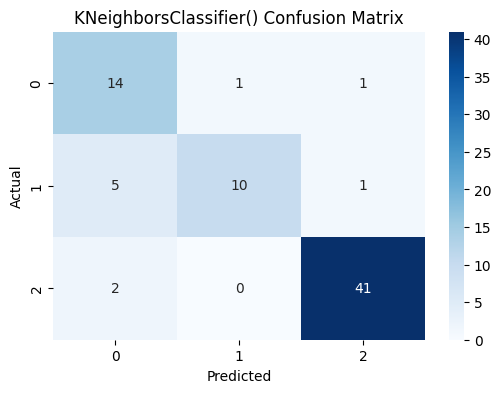

In [8]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the model
joblib.dump(knn, 'knn_model.pkl')

# Load the model
knn_loaded = joblib.load('knn_model.pkl')

# Predict using the loaded model
pred = knn_loaded.predict(X_test)

# Map predictions and ground truth labels
label_mapping = {2: "None", 1: "Sleep Apnea", 0: "Insomnia"}
mapped_pred = [label_mapping[label] for label in pred]
mapped_y_test = [label_mapping[label] for label in y_test]

# Print the mapped predictions
print(mapped_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"KNN Accuracy: {accuracy:.2f}")

# Print classification report
print(f"{knn_loaded} Classification Report:")
print(classification_report(y_test, pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'{knn_loaded} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


['None', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'Sleep Apnea', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'None', 'Insomnia', 'Insomnia', 'None', 'Insomnia', 'Insomnia', 'Insomnia', 'Sleep Apnea', 'None', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None', 'None', 'None', 'None', 'Insomnia', 'Sleep Apnea', 'Insomnia', 'Insomnia', 'None', 'None', 'None', 'None', 'Sleep Apnea', 'None', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'None', 'Insomnia', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None', 'Insomnia', 'None', 'None', 'Insomnia', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'Sleep Apnea', 'Sleep Apnea']
RF Accuracy: 0.88
RandomForestClassifier(random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.85      0.69      0.76   

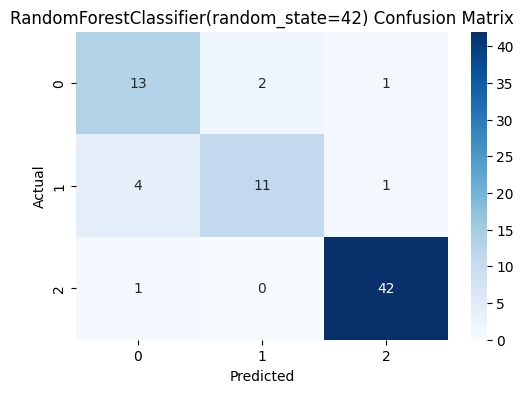

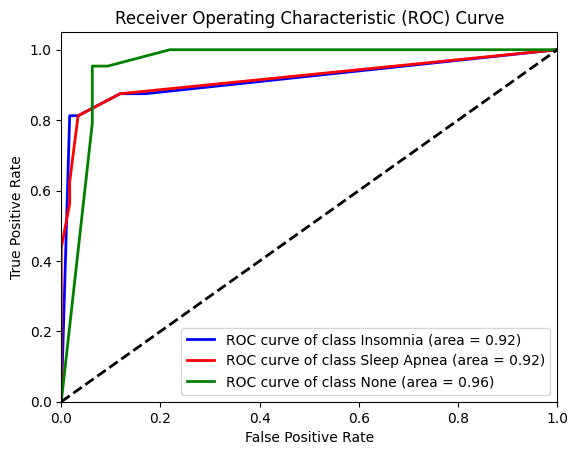

In [9]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Save the model
joblib.dump(RF, 'random_forest_model.pkl')

# Load the model
RF_loaded = joblib.load('random_forest_model.pkl')

# Predict using the loaded model
pred = RF_loaded.predict(X_test)

# Map predictions and ground truth labels
label_mapping = {2: "None", 1: "Sleep Apnea", 0: "Insomnia"}
mapped_pred = [label_mapping[label] for label in pred]
mapped_y_test = [label_mapping[label] for label in y_test]

# Print the mapped predictions
print(mapped_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"RF Accuracy: {accuracy:.2f}")

# Print classification report
print(f"{RF_loaded} Classification Report:")
print(classification_report(y_test, pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'{RF_loaded} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
pred_prob = knn_loaded.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i, color in zip(range(3), ['blue', 'red', 'green']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {label_mapping[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
